<a href="https://colab.research.google.com/github/PhilllipK/2-page-website/blob/main/coords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xarray as xr
import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
currentfile = 'air.2m.gauss.1994.nc'


llong = pd.read_csv('latsandlongs - Sheet1.csv')
llong = list(llong['longs'])
llat = pd.read_csv('latsandlongs - Sheet1.csv')
llat = list(llat['lats'])

cases = pd.read_csv('cases per 100k - Sheet1.csv')
counties = cases['Counties']

for i in range(len(llong)):
  llong[i] = float(llong[i])


forevery = []
for i in range(1994,2020):
  currentfile = currentfile[:13] + str(i) + currentfile[17:]
  thisyear = []
  tas = xr.open_dataset(currentfile)
  tas = tas['air']
  tas = tas.assign_coords(lon = (((tas.lon + 180) % 360) - 180))
  tas = tas.sortby(tas.lon)
  tas = tas.sortby(tas.lat)
  tas = tas.squeeze()
  for l in range(len(llong)):
    sample_vals = tas.sel(lat = llat[l], lon = llong[l], method = 'nearest').values
    sample_vals = list(sample_vals)
    toavg = []
    for m in range(len(sample_vals)):
      if sample_vals[m]-273.15 > 0:
        toavg.append(sample_vals[m]-273.15)
    avgfor = sum(toavg)/len(toavg)
    thisyear.append(avgfor)

  forevery.append(thisyear)

In [ ]:
cases = pd.read_csv('cases per 100k - Sheet1.csv')

counties = list(cases['Counties'])
cases = cases.drop("Counties", axis=1)

cases = cases[cases.columns[::-1]]
cases = cases.T
cases.columns = counties
cases

,ALBANY,ALLEGANY,BROOME,CATTARAUGUS,CAYUGA,CHAUTAUQUA,CHEMUNG,CHENANGO,CLINTON,COLUMBIA,...,TIOGA,TOMPKINS,ULSTER,WARREN,WASHINGTON,WAYNE,WESTCHESTER,WYOMING,YATES,NYC
1994,4.7,9.8,1.4,0.0,0.0,2.8,3.1,7.6,4.5,53.0,...,1.9,14.3,24.4,1.6,6.6,1.1,151.4,0.0,0.0,1.3
1995,2.7,0.0,0.0,0.0,0.0,0.7,2.0,3.8,5.6,59.3,...,1.9,5.1,31.0,0.0,0.0,1.1,78.2,2.3,0.0,6.1
1996,2.3,0.0,1.4,3.6,0.0,0.7,2.0,3.8,1.2,234.5,...,0.0,6.1,36.3,3.2,3.3,0.0,77.7,2.3,16.7,5.4
1997,2.6,2.0,1.4,0.0,0.0,0.0,0.0,1.9,0.0,208.0,...,3.7,5.9,64.3,0.0,1.6,1.1,32.4,4.5,0.0,2.3
1998,8.3,3.9,0.5,0.0,4.7,0.0,1.0,0.0,3.4,376.0,...,0.0,5.0,98.2,0.0,0.0,0.0,62.2,2.3,0.0,1.9
1999,4.9,0.0,0.9,1.2,0.0,2.1,3.0,1.9,4.5,602.4,...,0.0,5.8,89.2,0.0,0.0,0.0,60.5,0.0,0.0,1.8
2000,19.5,0.0,2.6,0.0,3.7,2.9,1.1,5.9,3.8,944.4,...,3.8,8.2,127.9,0.0,1.7,1.0,30.9,0.0,4.1,2.4
2001,22.4,2.0,0.0,0.0,2.4,1.4,0.0,0.0,6.3,1025.5,...,5.8,3.1,113.6,4.7,0.0,2.1,44.7,2.3,0.0,1.2
2002,56.0,2.0,0.5,0.0,1.2,0.0,1.1,3.9,2.5,1583.4,...,7.7,5.2,187.9,1.6,1.6,1.1,36.7,2.3,0.0,0.7
2003,33.4,4.0,2.5,0.0,0.0,0.7,0.0,0.0,11.1,1422.9,...,5.8,10.1,166.7,0.0,8.2,0.0,79.6,2.3,4.1,2.8


In [ ]:
temp = pd.DataFrame(forevery, columns = counties)
years = []

for i in range(1994,2020):
  years.append(i)

temp.index = years

#for i in range(len(years)):
temp

Counties,ALBANY,ALLEGANY,BROOME,CATTARAUGUS,CAYUGA,CHAUTAUQUA,CHEMUNG,CHENANGO,CLINTON,COLUMBIA,...,TIOGA,TOMPKINS,ULSTER,WARREN,WASHINGTON,WAYNE,WESTCHESTER,WYOMING,YATES,NYC
1994,12.827704,13.820109,13.359578,13.820109,13.503620,13.820109,13.503620,13.359578,12.727433,12.827704,...,13.503620,13.503620,13.359578,12.827704,12.827704,13.503620,12.885175,13.820109,13.503620,14.114003
1995,13.496624,14.720537,14.559958,14.720537,14.933713,14.720537,14.933713,14.559958,13.435423,13.496624,...,14.933713,14.933713,14.559958,13.496624,13.496624,14.933713,12.851056,14.720537,14.933713,14.587842
1996,12.519804,13.503381,12.979761,13.503381,12.980036,13.503381,12.980036,12.979761,12.281335,12.519804,...,12.980036,12.980036,12.979761,12.519804,12.519804,12.980036,12.036781,13.503381,12.980036,13.544218
1997,12.491118,13.072947,12.813211,13.072947,12.963921,13.072947,12.963921,12.813211,12.277264,12.491118,...,12.963921,12.963921,12.813211,12.491118,12.491118,12.963921,11.710276,13.072947,12.963921,12.901244
1998,12.214162,13.699999,12.755519,13.699999,13.356326,13.699999,13.356326,12.755519,12.756556,12.214162,...,13.356326,13.356326,12.755519,12.214162,12.214162,13.356326,11.954680,13.699999,13.356326,13.275320
1999,13.278224,14.506438,13.824784,14.506438,14.128966,14.506438,14.128966,13.824784,13.335860,13.278224,...,14.128966,14.128966,13.824784,13.278224,13.278224,14.128966,12.657058,14.506438,14.128966,13.886018
2000,11.811453,13.104365,12.190232,13.104365,12.514180,13.104365,12.514180,12.190232,11.120377,11.811453,...,12.514180,12.514180,12.190232,11.811453,11.811453,12.514180,12.233691,13.104365,12.514180,13.295314
2001,13.378821,14.009996,13.782723,14.009996,14.085269,14.009996,14.085269,13.782723,13.332767,13.378821,...,14.085269,14.085269,13.782723,13.378821,13.378821,14.085269,12.579937,14.009996,14.085269,13.807881
2002,12.453899,13.672683,13.368124,13.672683,13.672053,13.672683,13.672053,13.368124,12.906317,12.453899,...,13.672053,13.672053,13.368124,12.453899,12.453899,13.672053,12.196734,13.672683,13.672053,13.282701
2003,12.999795,13.331852,13.556210,13.331852,13.739912,13.331852,13.739912,13.556210,12.799908,12.999795,...,13.739912,13.739912,13.556210,12.999795,12.999795,13.739912,12.086544,13.331852,13.739912,13.491363


In [ ]:
lcors = []
for i in range(len(counties)):
  var1 = temp[counties[i]]
  var2 = cases[counties[i]]
  corr = np.corrcoef(var1, var2)[0,1]
  lcors.append(corr)

print('average correlation coefficent:', end = " ")
print(sum(lcors)/len(lcors))

average correlation coefficent: 0.21924581964908238


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

corcounties = pd.DataFrame(lcors)
corcounties = corcounties.T
corcounties.columns = counties
corcounties


,ALBANY,ALLEGANY,BROOME,CATTARAUGUS,CAYUGA,CHAUTAUQUA,CHEMUNG,CHENANGO,CLINTON,COLUMBIA,CORTLAND,DELAWARE,DUTCHESS,ERIE,ESSEX,FRANKLIN,FULTON,GENESEE,GREENE,HAMILTON,HERKIMER,JEFFERSON,LEWIS,LIVINGSTON,MADISON,MONROE,MONTGOMERY,NASSAU,NIAGARA,ONEIDA,ONONDAGA,ONTARIO,ORANGE,ORLEANS,OSWEGO,OTSEGO,PUTNAM,RENSSELAER,ROCKLAND,ST LAWRENCE,SARATOGA,SCHENECTADY,SCHOHARIE,SCHUYLER,SENECA,STEUBEN,SUFFOLK,SULLIVAN,TIOGA,TOMPKINS,ULSTER,WARREN,WASHINGTON,WAYNE,WESTCHESTER,WYOMING,YATES,NYC
0,0.237817,0.142204,0.303119,0.172473,0.132425,0.18993,0.292848,0.315397,0.404812,-0.187932,0.224112,0.319015,-0.723692,0.274829,0.214631,0.20986,0.253261,0.194715,0.065271,0.141175,0.315203,0.100558,0.244417,0.188864,0.30965,0.265704,0.336304,-0.019385,0.092882,0.382841,0.312794,0.285289,-0.038575,0.375909,0.311248,0.304592,0.132608,0.446673,0.554573,0.210737,0.375476,0.359539,0.347586,0.290516,0.209062,0.267731,-0.091638,0.490385,0.304172,0.301056,-0.001399,0.274449,0.297824,0.2831,-0.111673,0.118493,0.222755,0.489668


(array([ 1.,  0.,  0.,  0.,  3.,  3.,  8., 22., 17.,  4.]),
 array([-0.72369192, -0.59586539, -0.46803885, -0.34021232, -0.21238579,
        -0.08455925,  0.04326728,  0.17109382,  0.29892035,  0.42674688,
         0.55457342]),
 <BarContainer object of 10 artists>)

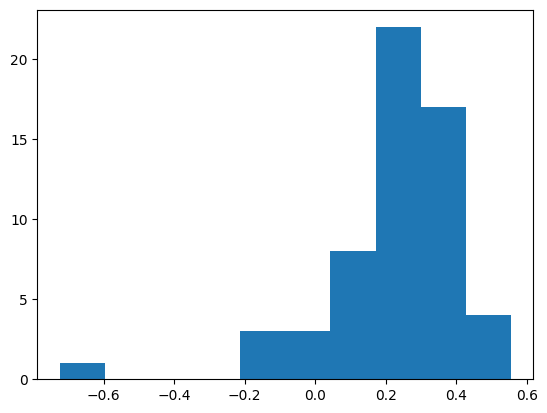

In [ ]:
plt.hist(lcors)